In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, shuffle=False, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, shuffle=False, random_state = 0)

In [4]:
train = X_train.append(y_train)
train = train.reset_index(drop=True)
train

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
193843,0.138557,-0.357080,1
193844,0.210678,-0.204016,1
193845,0.126537,-0.303867,1
193846,-0.186476,-0.246956,1


In [5]:
test = X_test.append(y_test)
test = test.reset_index(drop=True)
test

,DE,FE,Fault
0,0.058204,-0.015204,0
1,0.011057,0.005958,0
2,-0.066548,0.066362,0
3,-0.131845,0.110535,0
4,-0.132471,0.096153,0
...,...,...,...
48457,0.135958,-0.047255,1
48458,-0.083167,-0.070882,1
48459,0.391469,-0.181005,1
48460,0.185501,0.136011,1


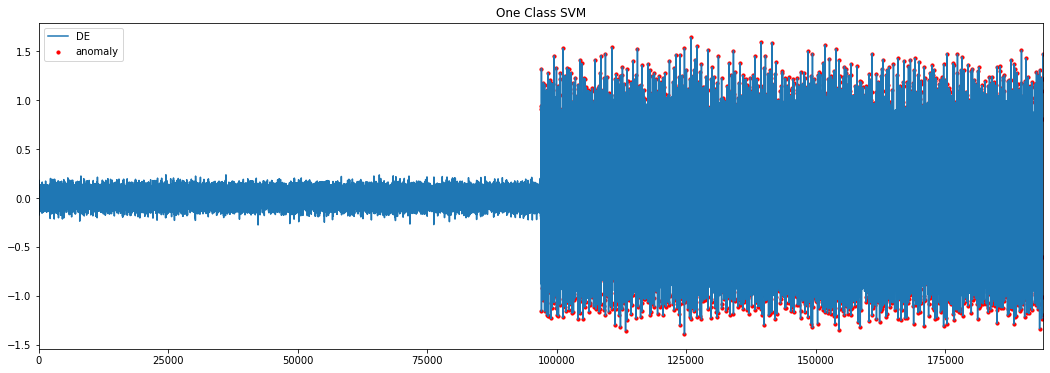

In [6]:
from sklearn.svm import OneClassSVM

train_data = train[['DE', 'FE', 'Fault']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(train_data)
train_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
pred_train = model.fit(train_data)
train['anomaly'] = pd.Series(model.predict(train_data))

train_anomalies = train[train['anomaly'] == -1]

f, (ax3) = plt.subplots(figsize=(18, 6))
ax3.scatter(train_anomalies.index, train_anomalies.DE, label='anomaly', color='red', s=10)
ax3.plot(train.index, train.DE, label='DE');
plt.xlim((0,len(train.index)))

plt.title('One Class SVM')
plt.legend();
plt.show();

In [7]:
train_anomalies

,DE,FE,Fault,anomaly
96977,0.937576,0.503569,1,-1
97053,1.322547,0.579793,1,-1
97056,0.911911,-0.292773,1,-1
97058,-1.157675,-0.369407,1,-1
97206,-0.916459,-0.555138,1,-1
...,...,...,...,...
193813,-1.009209,-0.314345,1,-1
193815,1.475073,0.749087,1,-1
193817,-1.195685,0.430427,1,-1
193819,0.808277,-0.525964,1,-1


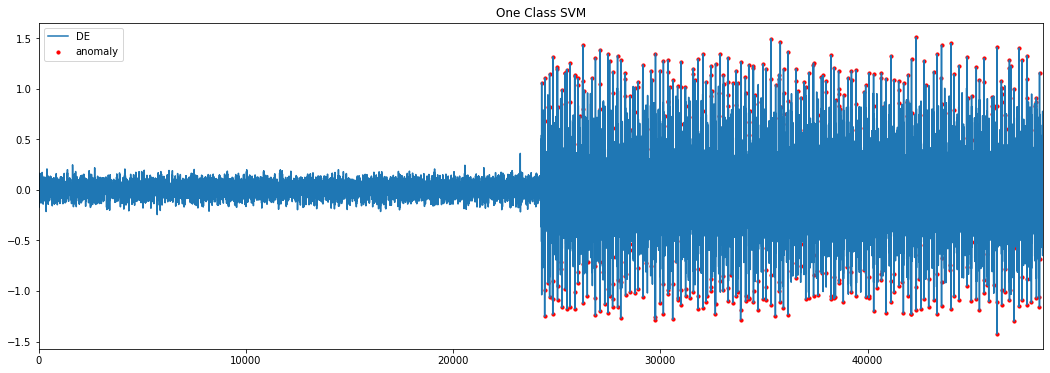

In [8]:
test_data = test[['DE', 'FE', 'Fault']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

test['anomaly'] = pd.Series(model.predict(test_data))

test_anomalies = test[test['anomaly'] == -1]

f, (ax3) = plt.subplots(figsize=(18, 6))
ax3.scatter(test_anomalies.index, test_anomalies.DE, label='anomaly', color='red', s=10)
ax3.plot(test.index, test.DE, label='DE');
plt.xlim((0,len(test.index)))

plt.title('One Class SVM')
plt.legend();
plt.show();

In [9]:
test_anomalies

,DE,FE,Fault,anomaly
24274,1.059239,0.612665,1,-1
24355,-0.590939,0.709024,1,-1
24418,-1.250588,0.426729,1,-1
24427,-0.985981,-0.366942,1,-1
24428,0.292058,-0.750320,1,-1
...,...,...,...,...
48284,-1.059727,0.091633,1,-1
48293,-1.154914,-0.556576,1,-1
48294,-0.042883,-0.808669,1,-1
48295,1.157675,-0.051980,1,-1


In [10]:
from sklearn.metrics import accuracy_score
score = 100 * accuracy_score(test['anomaly'], test['Fault'])
print("Accuracy: {:.2f}%".format(score))

Accuracy: 49.00%


In [11]:
print("Anomalies: {}".format(test_anomalies['anomaly'].count()))

Anomalies: 486
